In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import janitor
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
%matplotlib inline
pd.set_option('display.max_columns', 999)

In [17]:
import utils

df = pd.read_pickle('raw_data/YourMoney_Agency_Payroll.pkl')
df = utils.clean(df)

In [307]:
df_master = df[df['record_type']=='master']
df_detail = df[df['record_type']=='detail']
df_master.to_pickle('raw_data/df_master.pkl')
df_detail.to_pickle('raw_data/df_detail.pkl')

In [18]:
df.head(2).T

,0,1
calendar_year,2018,2018
calendar_quarter,4,4
as_of_date,2018-12-31 00:00:00,2018-12-31 00:00:00
payroll_id,1,1
last_name,reber,reber
first_name,frederick,frederick
middle_initial,none,none
full_name,"reber, frederick","reber, frederick"
salary_hourly_rate,25.69,0
master_department_agency_desc,corrections,corrections


In [310]:
master_list = ['calendar_year', 'payroll_id', 'salary_hourly_rate',
 'master_ytd_regular_pay',
 'master_ytd_overtime_payments',
 'master_ytd_all_other_payments',
 'master_ytd_earnings']
df_master2 = df_master[master_list]
df_detail2 = df_detail.drop(columns=master_list[2:], axis=1)

C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



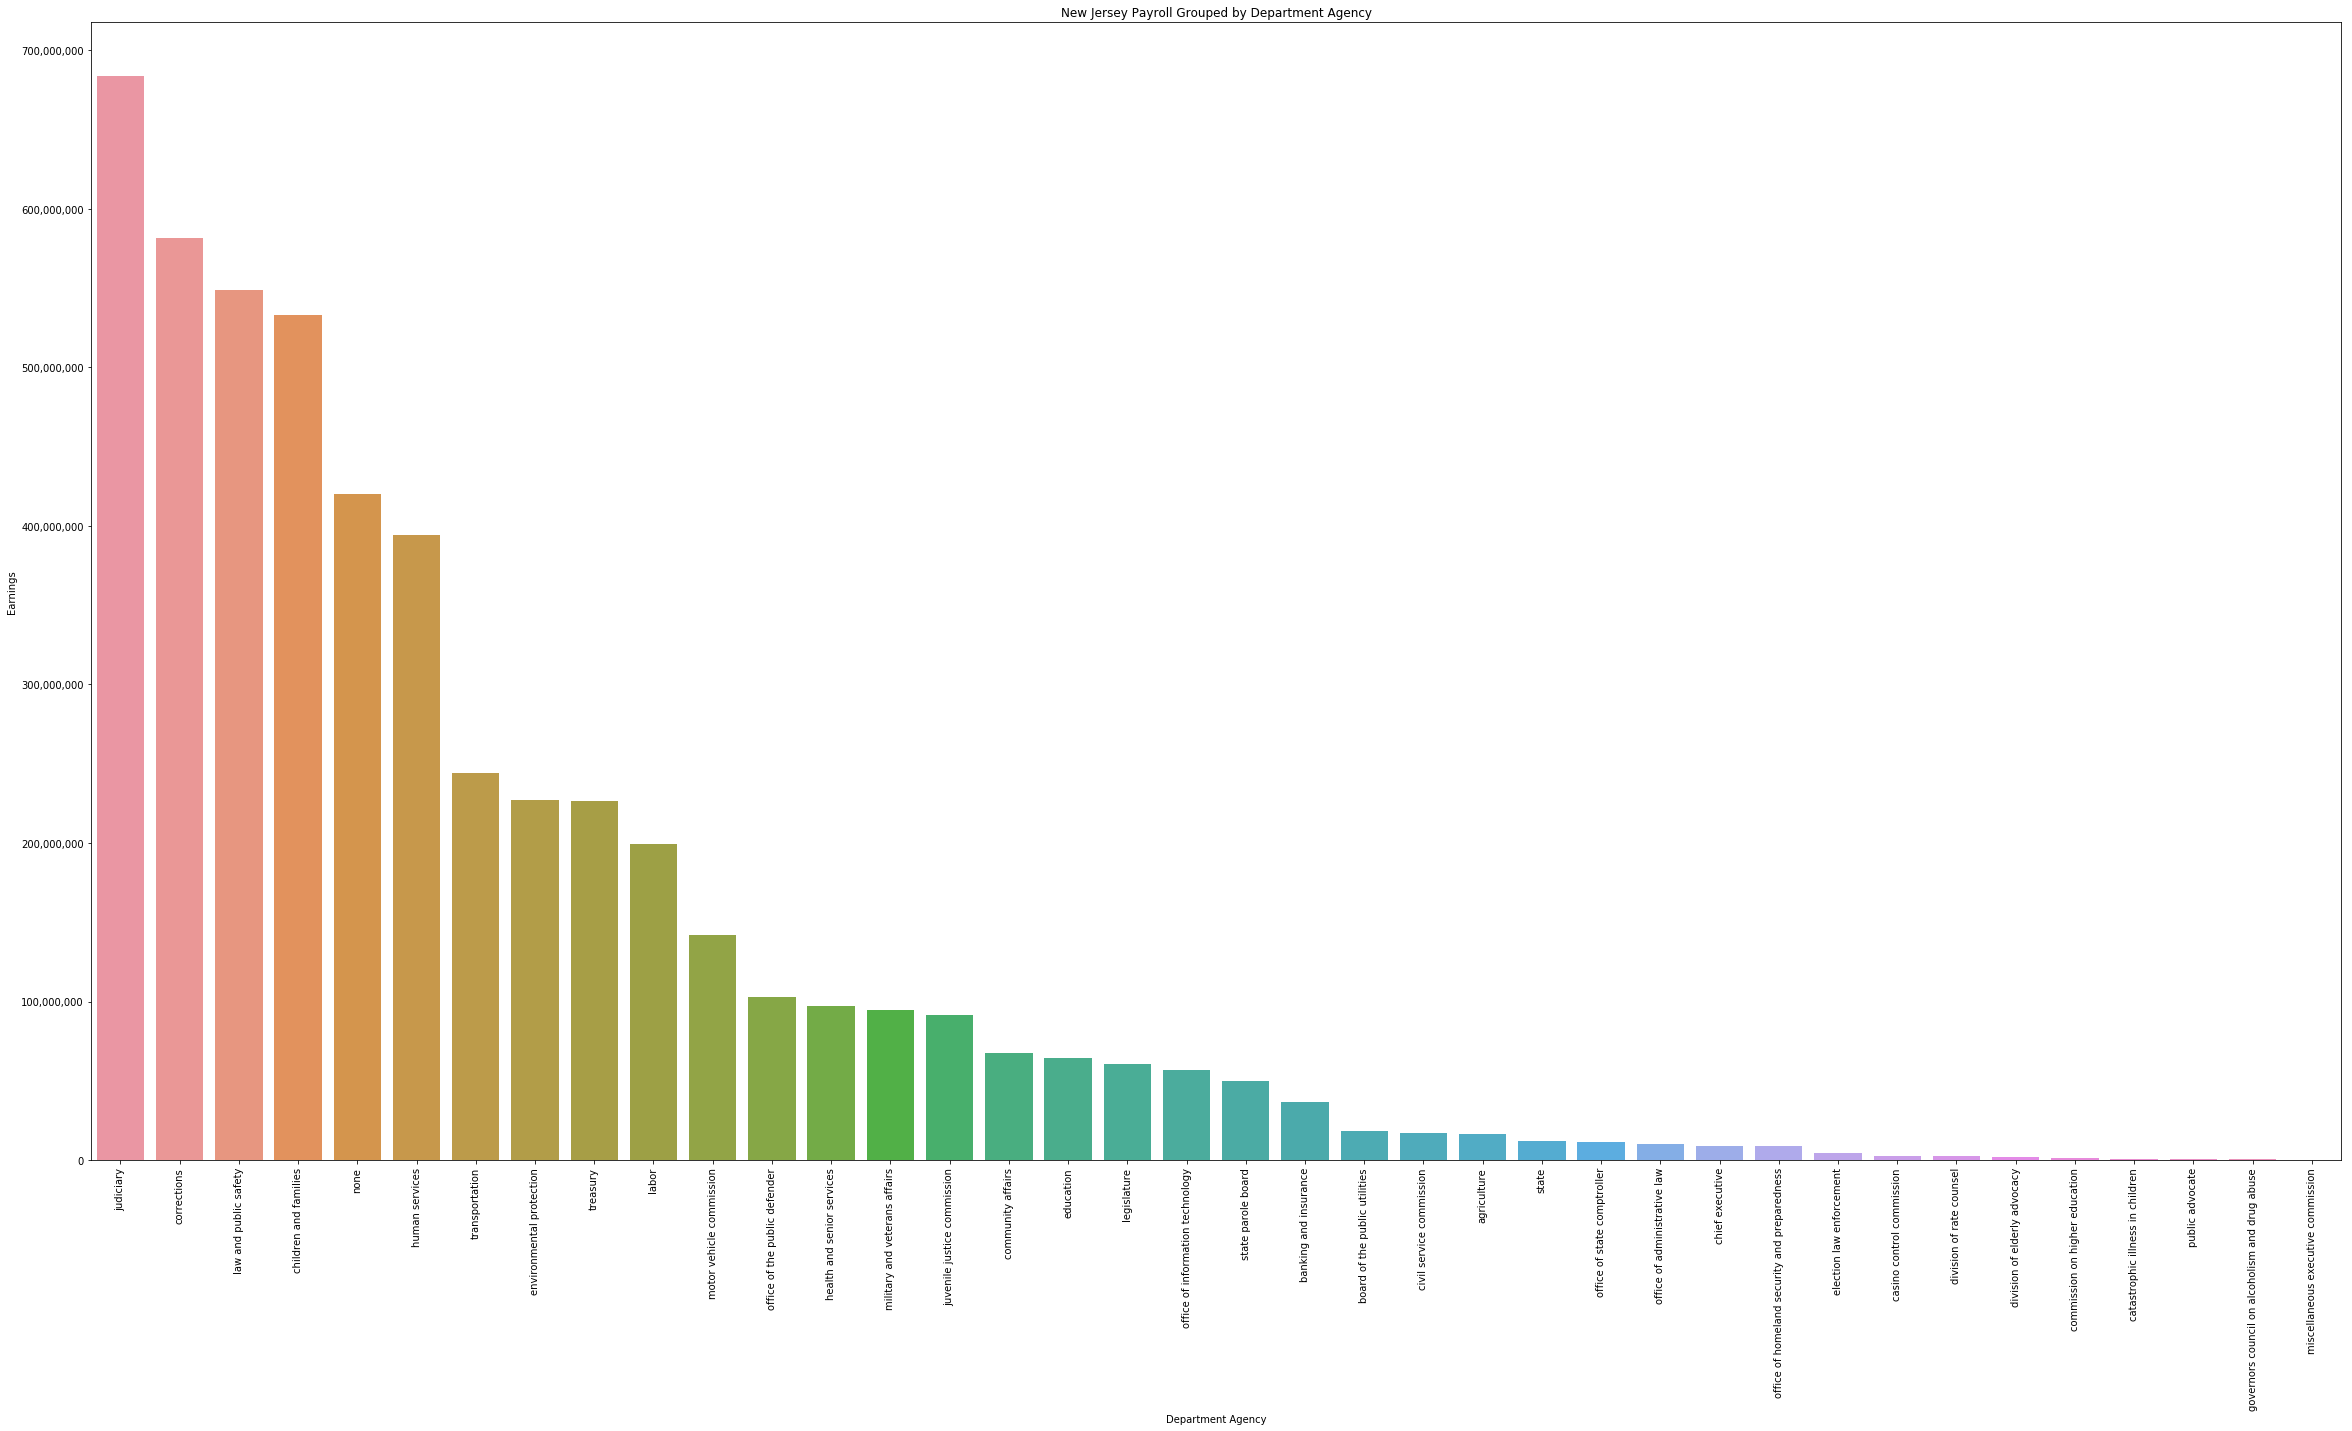

In [316]:
df3 = df_master[df['calendar_year']==2018].groupby('master_department_agency_desc').sum().sort_values(by='master_ytd_earnings', ascending=False)
fig, ax = plt.subplots(figsize=(32,20))
fig = sns.barplot(df3.index, df3['master_ytd_earnings'])
plt.xticks(rotation='vertical')
plt.title('New Jersey Payroll Grouped by Department Agency')
plt.tight_layout()
plt.ylabel('Earnings')
plt.xlabel('Department Agency')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.get_figure().savefig('output.png')
plt.show()

In [317]:
sorted(df_master['calendar_year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [318]:
df_by_years = df_master[['calendar_year', 'calendar_quarter', 'as_of_date', 'payroll_id',
       'last_name', 'first_name', 'middle_initial', 'full_name',
       'salary_hourly_rate', 'master_department_agency_desc',
       'master_section_desc', 'master_title_desc', 'employee_relations_group',
       'compensation_method', 'master_ytd_regular_pay',
       'master_ytd_overtime_payments', 'master_ytd_all_other_payments',
       'master_ytd_earnings']].sort_values(by='calendar_year', ascending=True)

In [319]:
max_pct_change = 1000 # np.inf
min_ytd_earnings = 20000
df2 = df_by_years[df_by_years['master_ytd_earnings'] > 20000].set_index(['calendar_year', 'payroll_id'])['master_ytd_earnings'].unstack(['payroll_id'])
df3 = df2.pct_change().max()
df4 = df3 < max_pct_change
df3[df4].sort_values(ascending=False)

payroll_id
77243     14.419111
108704     8.426208
153069     7.666667
17124      7.653908
146463     7.140024
108728     6.617550
135668     6.092406
146046     5.854755
31271      5.800869
135268     5.737593
60216      5.690891
146991     5.678990
116118     5.601227
139481     5.564604
115800     5.511534
122764     5.493115
12995      5.426442
80725      5.245047
77089      4.998182
135446     4.858945
135536     4.858945
146285     4.542147
40472      4.526645
108023     4.525915
98907      4.471564
77325      4.434170
153854     4.404842
140207     4.395345
135133     4.390076
43831      4.361115
            ...    
149787    -0.416772
147342    -0.422425
150228    -0.423592
148253    -0.432177
148606    -0.437507
138430    -0.437986
148069    -0.440415
148285    -0.443413
146279    -0.443886
147175    -0.444217
144921    -0.446983
143869    -0.456969
147621    -0.462384
145966    -0.468629
146624    -0.483626
146775    -0.489969
148608    -0.490167
145709    -0.505711
50601    

In [320]:
payroll_id = 160585
df_master[df_master['payroll_id']==payroll_id].sort_values(by='calendar_year')

,calendar_year,calendar_quarter,as_of_date,payroll_id,last_name,first_name,middle_initial,full_name,salary_hourly_rate,master_department_agency_desc,master_section_desc,master_title_desc,employee_relations_group,compensation_method,master_ytd_regular_pay,master_ytd_overtime_payments,master_ytd_all_other_payments,master_ytd_earnings,paid_department_agency_desc,paid_section_desc,regular_pay,supplemental_pay,one_time_payments,legislator_or_back_pay,overtime_payments,clothing_uniform_payments,retroactive_pay,lump_sum_pay,cash_in_lieu_maintenance,ytd_earnings,record_type
164505,2018,4,2018-12-31,160585,hilliard,katie,none,"hilliard, katie",29118.79,none,none listed,telephone operator,administrative and clerical services (cwa) - u...,annual salary,7839.65,12.0,0.0,7851.65,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master


In [321]:
df_master.groupby('master_department_agency_desc')['master_ytd_earnings'].describe()

,count,mean,std,min,25%,50%,75%,max
master_department_agency_desc,,,,,,,,
agriculture,2913.0,48968.888239,35507.817351,0.00,10759.0000,53136.020,75955.2300,156692.36
banking and insurance,4801.0,70670.705051,29452.847348,0.00,51089.5600,72906.550,91835.6400,163264.92
board of the public utilities,2323.0,77416.370616,28269.524298,0.00,61541.0400,82196.180,98861.7650,156380.08
casino control commission,843.0,55472.645492,27147.391839,176.27,41489.4900,55578.710,67457.9200,145598.15
catastrophic illness in children,107.0,70913.075701,32050.699416,0.00,46650.7050,76349.960,94513.0700,134458.43
chief executive,1399.0,54642.755368,39470.886639,65.00,24454.8550,46381.700,79649.5650,180706.90
children and families,65408.0,64980.431968,26015.322647,0.00,48700.2800,65601.535,83642.9100,351432.58
civil service commission,2402.0,63315.673472,28391.933194,0.00,44208.5700,64626.420,84703.3100,153740.66
commerce commission,7.0,60227.071429,34568.012521,3885.44,46858.1850,61865.430,76366.2900,109389.68


In [322]:
df_master[(df_master['master_department_agency_desc']=='none')].sort_values(by="master_ytd_earnings",ascending=False)

,calendar_year,calendar_quarter,as_of_date,payroll_id,last_name,first_name,middle_initial,full_name,salary_hourly_rate,master_department_agency_desc,master_section_desc,master_title_desc,employee_relations_group,compensation_method,master_ytd_regular_pay,master_ytd_overtime_payments,master_ytd_all_other_payments,master_ytd_earnings,paid_department_agency_desc,paid_section_desc,regular_pay,supplemental_pay,one_time_payments,legislator_or_back_pay,overtime_payments,clothing_uniform_payments,retroactive_pay,lump_sum_pay,cash_in_lieu_maintenance,ytd_earnings,record_type
101802,2018,4,2018-12-31,104699,bhatti,jamil,m,"bhatti, jamil m",211713.80,none,none listed,clncl psychtrst brd cert,professional unit (cwa) - unit p,annual salary,207287.04,8700.0,216212.00,432199.04,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
276918,2017,4,2017-12-31,104699,bhatti,jamil,m,"bhatti, jamil m",203492.70,none,none listed,clncl psychtrst brd cert,professional unit (cwa) - unit p,annual salary,202398.51,18950.0,188291.89,409640.40,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
3525,2018,4,2018-12-31,4114,bari,mohammad,m,"bari, mohammad m",199652.60,none,none listed,clinical psychiatrist brd elig,professional unit (cwa) - unit p,annual salary,195478.04,0.0,168044.80,363522.84,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
238894,2017,4,2017-12-31,68485,patel,jayantilal,none,"patel, jayantilal",218842.78,none,none listed,clncl psychtrst post cert,professional unit (cwa) - unit p,annual salary,218423.53,0.0,139050.00,357473.53,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
67557,2018,4,2018-12-31,68485,patel,jayantilal,none,"patel, jayantilal",227684.03,none,none listed,clncl psychtrst post cert,professional unit (cwa) - unit p,annual salary,222923.38,0.0,125058.40,347981.78,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
97149,2018,4,2018-12-31,99572,roth,robert,l,"roth, robert l",199652.60,none,none listed,clinical psychiatrist brd elig,professional unit (cwa) - unit p,annual salary,195478.04,0.0,144807.30,340285.34,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
168453,2017,4,2017-12-31,4114,bari,mohammad,m,"bari, mohammad m",191899.84,none,none listed,clinical psychiatrist brd elig,professional unit (cwa) - unit p,annual salary,191532.12,0.0,142600.00,334132.12,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
117878,2018,4,2018-12-31,127426,zubair,faiza,none,"zubair, faiza",227684.03,none,none listed,clncl psychtrst post cert,professional unit (cwa) - unit p,annual salary,222923.38,0.0,102258.40,325181.78,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
274480,2017,4,2017-12-31,102437,gaviola,gerry,none,"gaviola, gerry",218842.78,none,none listed,clncl psychtrst post cert,professional unit (cwa) - unit p,annual salary,218339.36,0.0,99571.67,317911.03,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master
99600,2018,4,2018-12-31,102437,gaviola,gerry,none,"gaviola, gerry",227684.03,none,none listed,clncl psychtrst post cert,professional unit (cwa) - unit p,annual salary,218714.88,0.0,97263.40,315978.28,none,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master


In [327]:
df_unit_q = df_master[df_master['employee_relations_group'].str.contains('unit q')]

In [324]:
retired_pension = pd.read_csv('raw_data/YourMoney_Retired_Pension_Members.csv')
retired_pension = janitor.clean_names(retired_pension)


C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (7,26) have mixed types. Specify dtype option on import or set low_memory=False.



In [22]:
retired_pension.head(2).T

,0,1
report_year_month,201809,201809
as_of_date,September 30 2018,September 30 2018
member_key,262929,262931
member_last_name,PAPE,COX
member_first_name,MILDRED,PAUL
member_middle_initial,H,NaN
member_full_name,"PAPE, MILDRED H","COX, PAUL"
member_birth_year,1920,1940
member_retirement_cause,Early retirement,Service
member_last_employer,TEANECK BD OF ED,SOUTH WOODS PRISON-DEPT. OF COR


In [328]:
year=2018
ret_still_salary = retired_pension.merge(df_unit_q, left_on='member_full_name', right_on='full_name')
ret_still_salary[(ret_still_salary['last_standard_allowance_yearmo'].str.contains('2018')) & (ret_still_salary['calendar_year']==year)]

,report_year_month,as_of_date_x,member_key,member_last_name,member_first_name,member_middle_initial,member_full_name,member_birth_year,member_retirement_cause,member_last_employer,member_pension_fund,member_retirement_date,member_salary_for_calculation,member_final_months_of_service,type_of_benefit,mthly_pension_allowance,mthly_cost_of_living_allowance,mthly_supplemental_allowance,mthly_total_allowances,last_standard_allowance_yearmo,ytd_pension_pymnts,ytd_cost_of_living_pymnts,ytd_supplemental_pymnts,ytd_one_time_adjustment_pymnts,ytd_total_paymnts,last_disbursement_yearmo,retirement_cancellation_date,calendar_year,calendar_quarter,as_of_date_y,payroll_id,last_name,first_name,middle_initial,full_name,salary_hourly_rate,master_department_agency_desc,master_section_desc,master_title_desc,employee_relations_group,compensation_method,master_ytd_regular_pay,master_ytd_overtime_payments,master_ytd_all_other_payments,master_ytd_earnings,paid_department_agency_desc,paid_section_desc,regular_pay,supplemental_pay,one_time_payments,legislator_or_back_pay,overtime_payments,clothing_uniform_payments,retroactive_pay,lump_sum_pay,cash_in_lieu_maintenance,ytd_earnings,record_type


In [326]:
ret_still_salary[ret_still_salary['calendar_year']==year].head()

,report_year_month,as_of_date_x,member_key,member_last_name,member_first_name,member_middle_initial,member_full_name,member_birth_year,member_retirement_cause,member_last_employer,member_pension_fund,member_retirement_date,member_salary_for_calculation,member_final_months_of_service,type_of_benefit,mthly_pension_allowance,mthly_cost_of_living_allowance,mthly_supplemental_allowance,mthly_total_allowances,last_standard_allowance_yearmo,ytd_pension_pymnts,ytd_cost_of_living_pymnts,ytd_supplemental_pymnts,ytd_one_time_adjustment_pymnts,ytd_total_paymnts,last_disbursement_yearmo,retirement_cancellation_date,calendar_year,calendar_quarter,as_of_date_y,payroll_id,last_name,first_name,middle_initial,full_name,salary_hourly_rate,master_department_agency_desc,master_section_desc,master_title_desc,employee_relations_group,compensation_method,master_ytd_regular_pay,master_ytd_overtime_payments,master_ytd_all_other_payments,master_ytd_earnings,paid_department_agency_desc,paid_section_desc,regular_pay,supplemental_pay,one_time_payments,legislator_or_back_pay,overtime_payments,clothing_uniform_payments,retroactive_pay,lump_sum_pay,cash_in_lieu_maintenance,ytd_earnings,record_type


In [25]:
df_master2.head().T

,0,2,4,6,8
calendar_year,2018.00,2018.00,2018.00,2018.00,2018.00
payroll_id,1.00,2.00,5.00,9.00,10.00
salary_hourly_rate,25.69,60350.09,79479.32,69201.51,110169.34
master_ytd_regular_pay,12652.38,34176.59,77817.46,67754.56,103700.20
master_ytd_overtime_payments,0.00,217.22,0.00,0.00,5477.68
master_ytd_all_other_payments,2965.95,11211.18,1794.00,1727.60,2952.30
master_ytd_earnings,15618.33,45604.99,79611.46,69482.16,112130.18


In [26]:
df_master3 = df_master2.set_index(['calendar_year', 'payroll_id'])
master_payroll_year = df_master3['master_ytd_earnings'].unstack()
top_earners = master_payroll_year.sum().sort_values(ascending=False)

In [27]:
name_list = df[['payroll_id', 'last_name', 'first_name', 'middle_initial', 'full_name']].drop_duplicates()

In [28]:
payroll_id = 91928
name_list[name_list['payroll_id']==payroll_id]

,payroll_id,last_name,first_name,middle_initial,full_name
90758,91928,ANDREWS,WAVERLY,S,"ANDREWS, WAVERLY S"


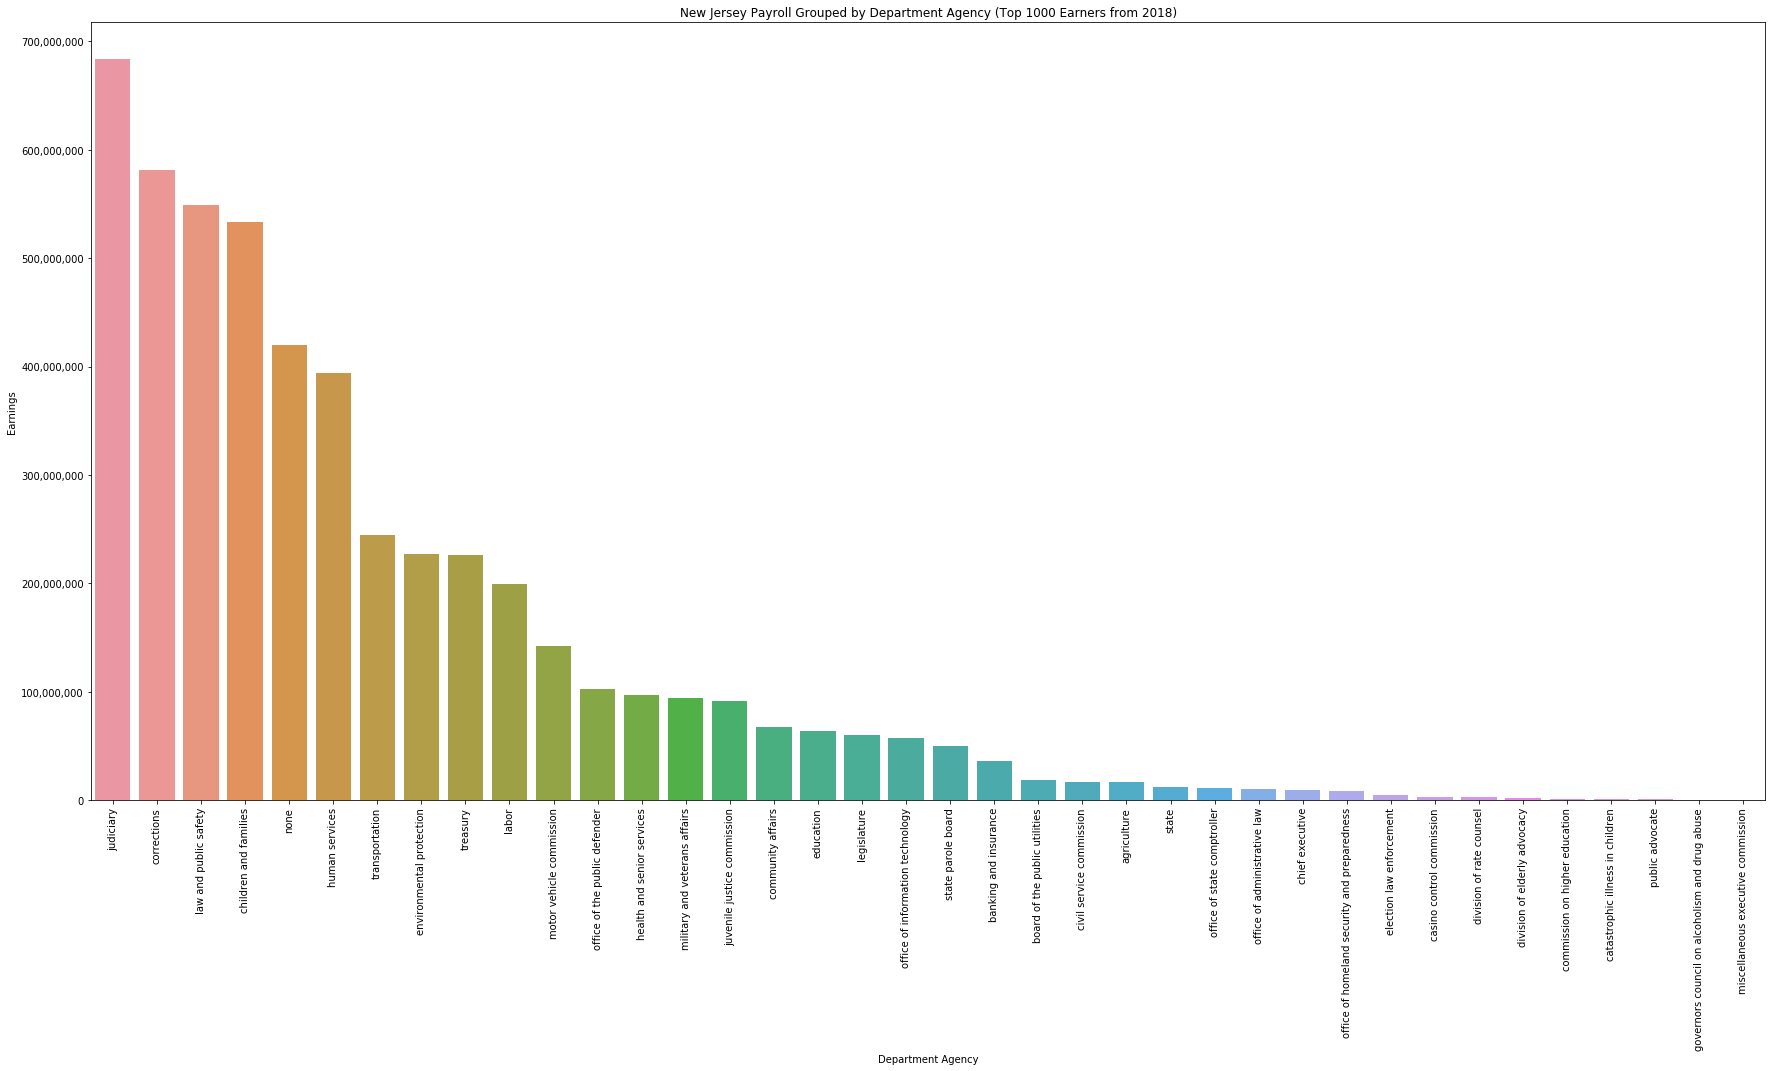

In [154]:
a = df_master[df_master['calendar_year']==2018].sort_values(by='master_ytd_earnings', ascending=False).groupby('master_department_agency_desc').agg({'master_ytd_earnings': 'sum'}).sort_values(by='master_ytd_earnings', ascending=False)
fig, ax = plt.subplots(figsize=(24,15))
fig = sns.barplot(a.index, a['master_ytd_earnings'])
plt.xticks(rotation='vertical')
plt.title('New Jersey Payroll Grouped by Department Agency (Top 1000 Earners from 2018)')
plt.tight_layout()
plt.ylabel('Earnings')
plt.xlabel('Department Agency')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.get_figure().savefig('Top1000_2018only.png')
plt.show()

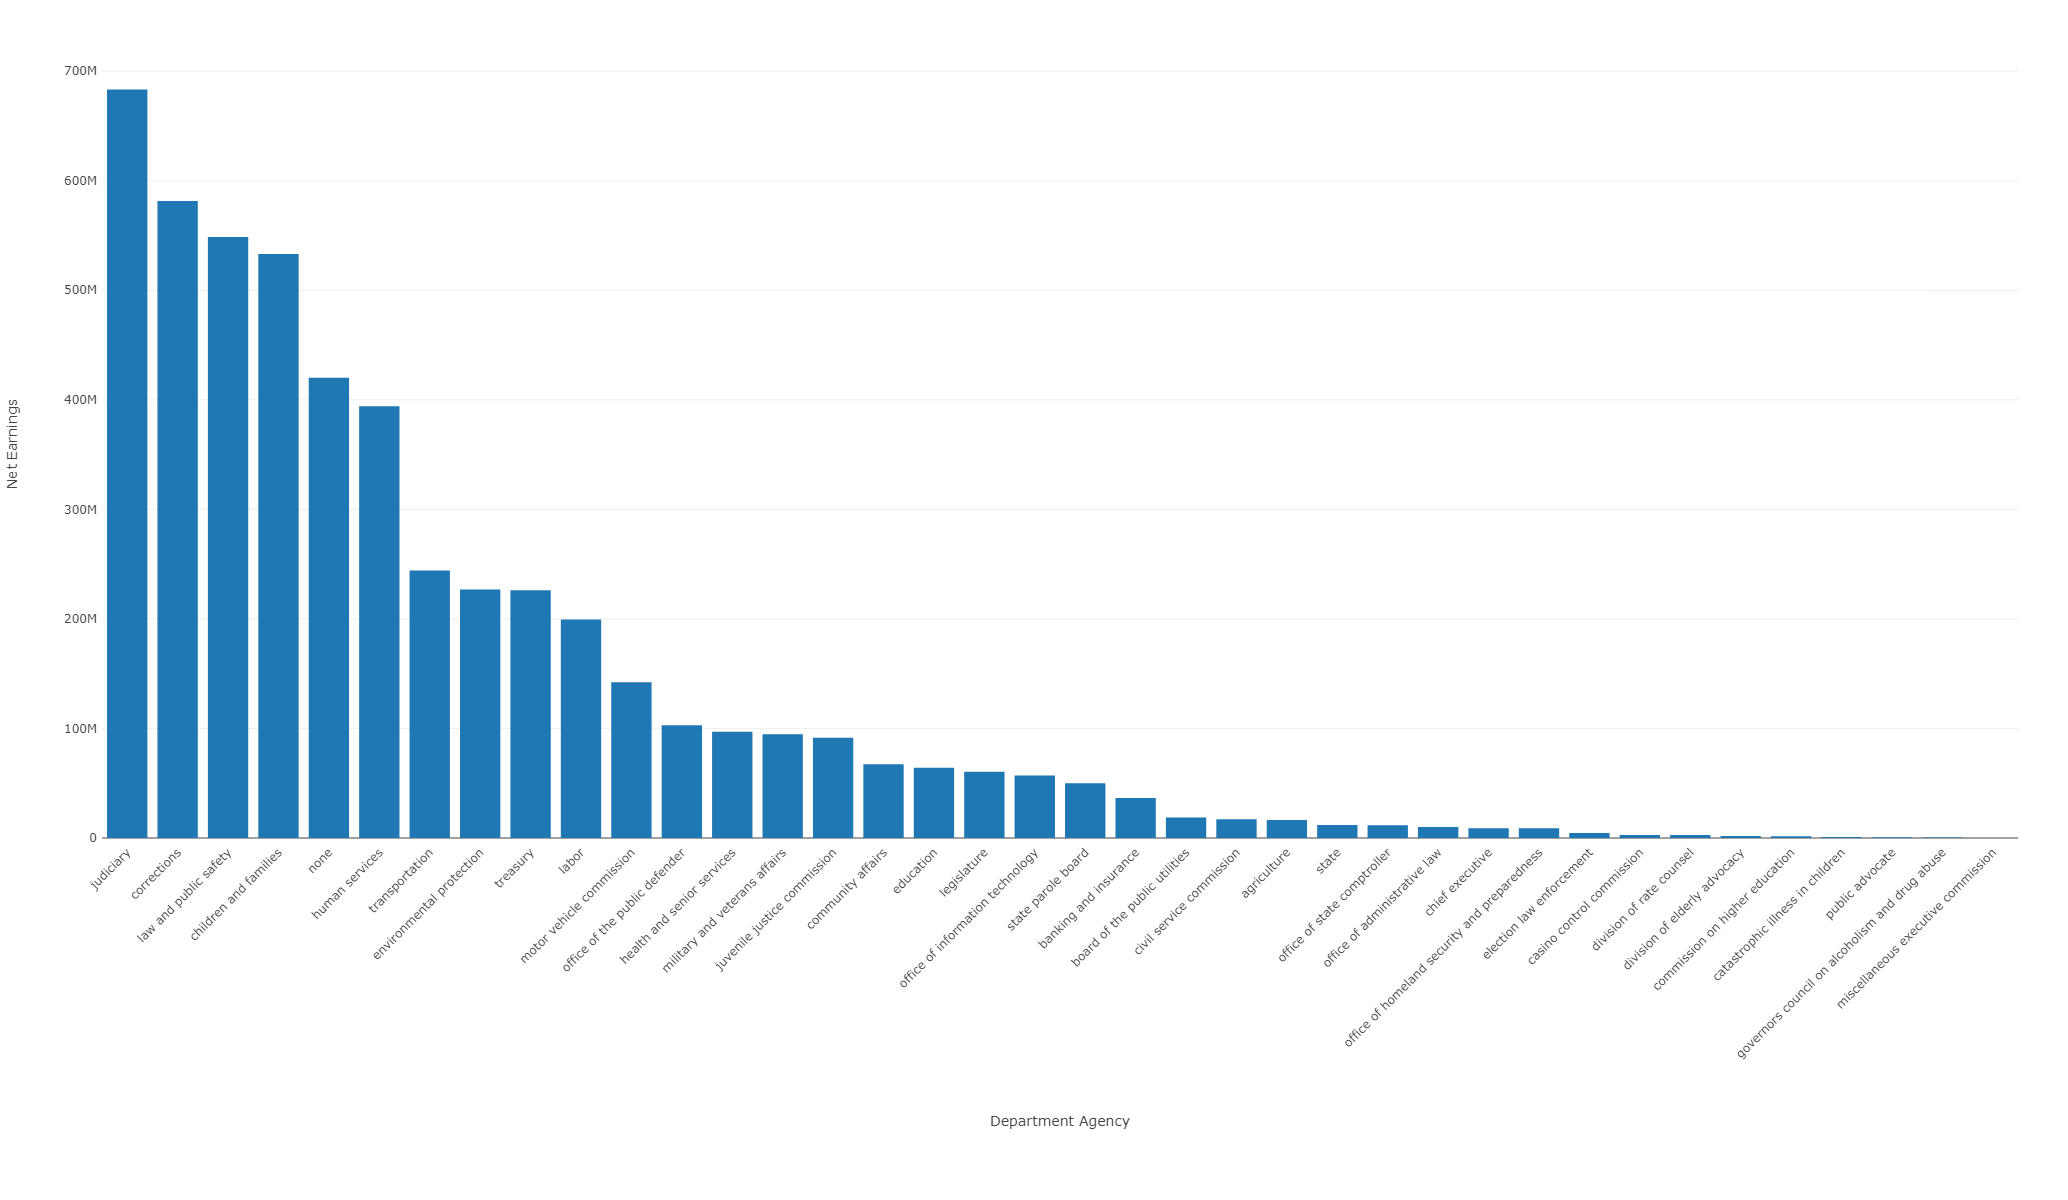

In [142]:
init_notebook_mode(connected=True)
data = [go.Bar(
            x=a.index,
            y=a['master_ytd_earnings']
    )]
layout = go.Layout(
    autosize=False,
    width=2000,
    height=1200,
    xaxis=dict(
        title = ''.join(['Department Agency'] + [u'\xa0'] * 20 + [u'\n\xa0'] * 10),
        tickangle=-45,
        tickprefix= u'\xa0' * 30 + '\n' * 10,
        automargin=True
    ),
    yaxis=dict(
        title = 'Net Earnings',
        tickprefix= ' ' * 10,
        automargin=True
    ),
    margin=go.layout.Margin(
        l=100,
        r=50,
        b=250,
        t=50,
        pad=4
    ),
    barmode='group',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [139]:
# Check distribution of compensation methods
df_master['compensation_method'].unique()

array(['HOURLY', 'ANNUAL SALARY', 'PER DIEM', 'None Listed', 'PART TIME'], dtype=object)

In [140]:
compensation_method_cnt = df_master.groupby('compensation_method').agg({'payroll_id': ['count', ('ratio', lambda x: x.count() / len(df_master))]})

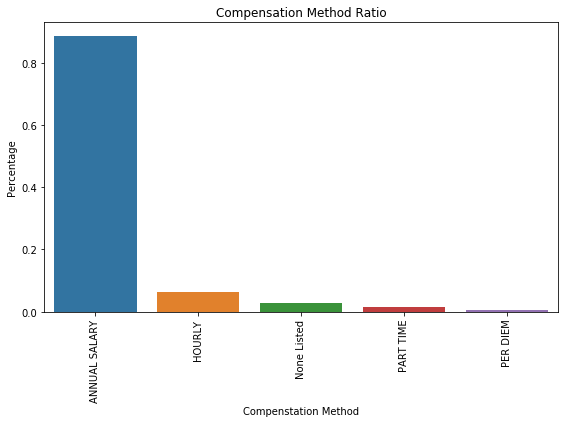

In [141]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sns.barplot(compensation_method_cnt['payroll_id'].index, compensation_method_cnt['payroll_id']['ratio'])
plt.xticks(rotation='vertical')
plt.title('Compensation Method Ratio')
plt.tight_layout()
plt.ylabel('Percentage')
plt.xlabel('Compenstation Method')
fig.get_figure().savefig('compensation_method_ratio.png')
plt.show()

In [228]:
b = df_master[df_master['calendar_year']==2018].sort_values(by='master_ytd_earnings', ascending=False).groupby(['master_department_agency_desc', 'compensation_method']).agg({'master_ytd_earnings': 'sum'}).sort_values(by='master_ytd_earnings', ascending=False)

In [180]:
c = b.unstack()
c['master_ytd_earnings'].fillna(0, inplace=True)
d = c.unstack().unstack().reset_index().T[1:]
d = d.rename(columns=d.iloc[0]).drop(d.index[0])

master_department_agency_desc
agriculture                                       1.559039e+07
banking and insurance                             3.619077e+07
board of the public utilities                     1.861771e+07
casino control commission                         2.773663e+06
catastrophic illness in children                  1.008775e+06
chief executive                                   8.908299e+06
children and families                             5.314834e+08
civil service commission                          1.707656e+07
commission on higher education                    1.486487e+06
community affairs                                 6.675969e+07
corrections                                       5.810614e+08
division of elderly advocacy                      1.744321e+06
division of rate counsel                          2.723714e+06
education                                         6.045545e+07
election law enforcement                          4.495653e+06
environmental protection 

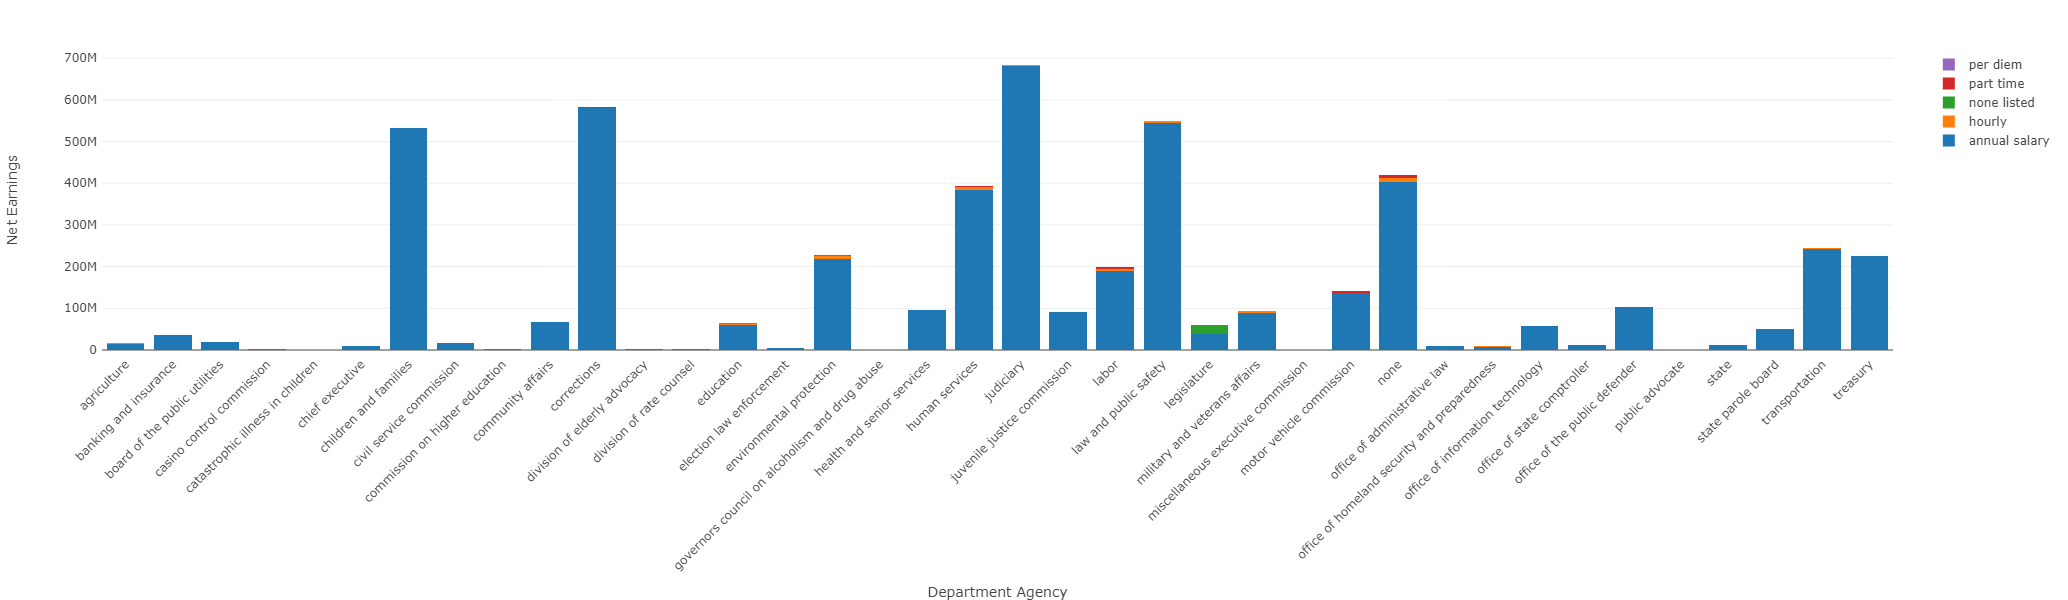

In [295]:
init_notebook_mode(connected=True)

data = []
for i in d.columns:
    data.append(go.Bar(
        x = d.index,
        y = d[i],
        name = i.lower()
    ))

layout = go.Layout(
    autosize=False,
    width=1000,
    height=600,
    xaxis=dict(
        title = ''.join(['Department Agency'] + [u'\xa0'] * 20 + [u'\n\xa0'] * 10),
        tickangle=-45,
        tickprefix= u'\xa0' * 20 + '\n' * 10,
        automargin=True
    ),
    yaxis=dict(
        title = 'Net Earnings',
        tickprefix= ' ' * 10,
        automargin=True
    ),
    margin=go.layout.Margin(
        l=100,
        r=50,
        b=250,
        t=50,
        pad=4
    ),
    barmode='stack',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [288]:
relative_compensation_method_2018 = d.copy(deep=True)
for i in relative_compensation_method_2018.columns:
    relative_compensation_method_2018[i] = pd.to_numeric(relative_compensation_method_2018[i])
relative_compensation_method_2018['total'] = relative_compensation_method_2018.sum(axis=1)

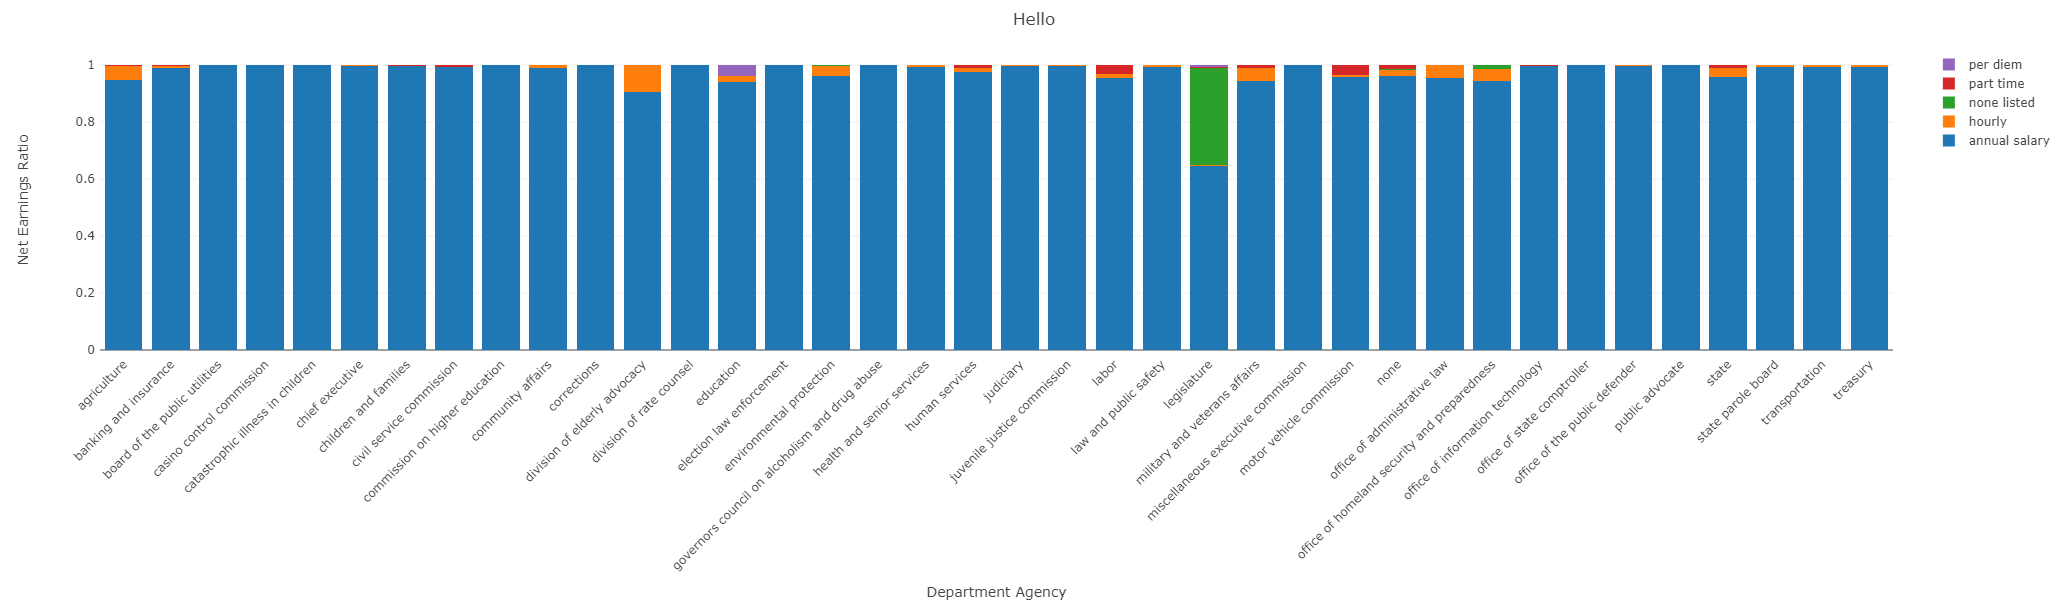

In [296]:
init_notebook_mode(connected=True)

data = []

for i in relative_compensation_method_2018.columns:
    if i != 'total':
        data.append(go.Bar(
            x = relative_compensation_method_2018.index,
            y = relative_compensation_method_2018[i] / relative_compensation_method_2018['total'],
            name = i.lower()
        ))

layout = go.Layout(
    autosize=False,
    width=1000,
    height=600,
    title='100% ',
    xaxis=dict(
        title = ''.join(['Department Agency'] + [u'\xa0'] * 20 + [u'\n\xa0'] * 10),
        tickangle=-45,
        tickprefix= u'\xa0' * 20 + '\n' * 10,
        automargin=True
    ),
    yaxis=dict(
        title = 'Net Earnings Ratio',
        tickprefix= ' ' * 10,
        automargin=True
    ),
    margin=go.layout.Margin(
        l=100,
        r=50,
        b=250,
        t=50,
        pad=4
    ),
    barmode='stack',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='')